# Data Analytics Project - Why this happened in past?

    1. Domain Exploration
        - understand how business functions
        - identifying some possible points where you may want to explore later
        - identify some drawbacks of business process and build a list of doubts
        
    2. Data Exploration
        - collect data from business
        - explore data - build your list of doubts related to dataset
        
    3. Data Cleaning
        - remove unwated columns
        - handle duplicate entries
        - handle missing values
        - handle outliers and un natural values
        
    4. Exploratory Analytics
        - Use Data Visualization 
            - Univariate Analytics - analyse one attribute individually
            - Bivariate Analytics - analyse the impact of every attribute on the KPI
            - Multivariate Analytics- analyse combined impact of multiple attributes/features on the KPI
        - Use Statistics 
        
    5. Prepare a report
        - what was wrong in past?
        - what should be done in future?
        - which existing efforts/policies are not helpful?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\MLIoT\ML\dataset\Bank_churn_modelling.csv")
df.shape

(10000, 14)

# 2. Data Exploration

In [3]:
df.shape

(10000, 14)

In [4]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
# unwanted columns - RowNumber, CustomerId, Surname

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Analysis** - more than 25% of customers have balance = 0

# 3. Data Cleaning

In [10]:
#remove unwanted columns
df.drop(["RowNumber",'CustomerId',"Surname"],axis=1,inplace=True) # do not execute two times

In [11]:
# check for duplicate entries
df.duplicated().sum()

0

In [12]:
#check for missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
#check for outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

# 3. Exploratory Analytics

### Using Data Visualization

##### Univariate Analytics


In [14]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

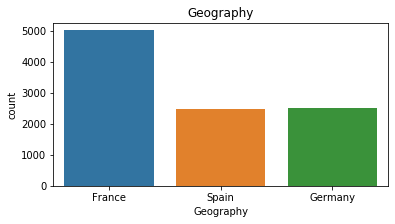

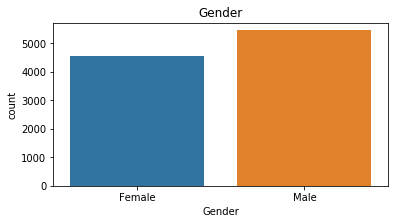

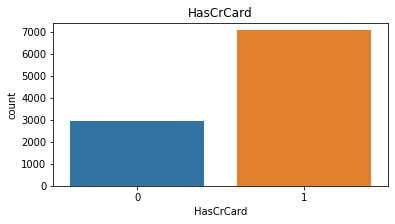

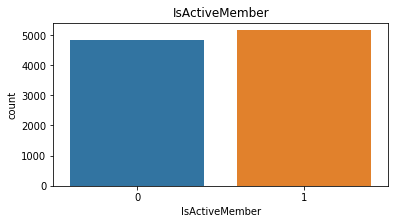

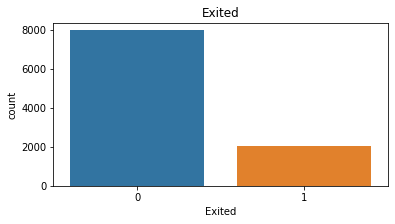

In [16]:
cat = ['Geography', 'Gender','HasCrCard', 'IsActiveMember','Exited']

for col in cat:
    plt.figure(figsize=(6,3))
    sns.countplot(df[col])
    plt.title(col)
    plt.show()

**Analysis** - 

    1. almost 50% of customers are from France andrest 25% are from Spain and Germany each
    2. majority of customers (approx 55%) are Male
    3. 70% of customers have credit card and 30% of them do not have any creditcard
    4. almost 50% of customers are not actively using bank account
    5. 20% of customers left the bank

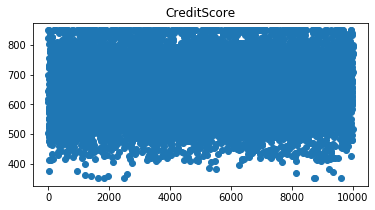

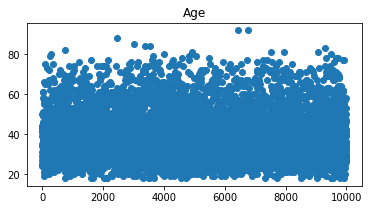

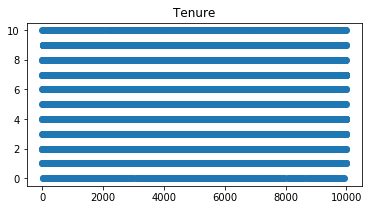

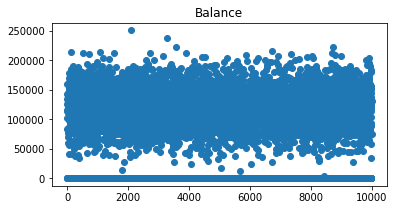

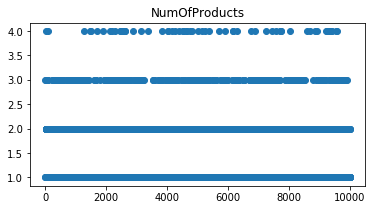

In [17]:
nums = ['CreditScore','Age', 'Tenure', 'Balance','NumOfProducts']

for col in nums:
    plt.figure(figsize=(6,3))
    plt.scatter(df.index,df[col])
    plt.title(col)
    plt.show()

**Analysis**

    1. Majority of customers have creditscore between 400 to 900
    2. Majority of customers have age between 20 to 70
    3. all customers have value of tenure equally spread between 0 to 10
    4. there are two types of customers, one how 0 balance and other who have balance between 50k to 200k
    5. majority of customers have either 1 or two products, rest have 3 or 4 products

#### Bivariate Analysis

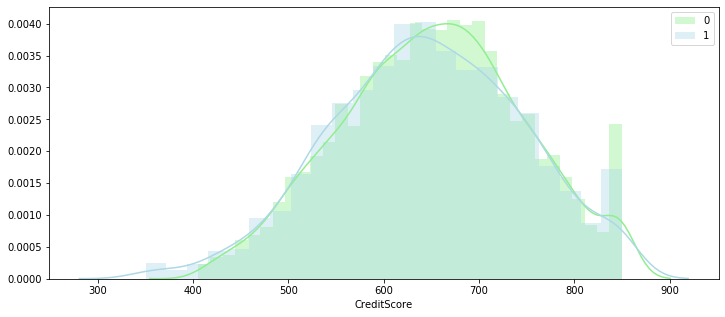

In [18]:
# numeric v/s categorical - probability density distribution analysis
# cerditscore v/s exited

plt.figure(figsize=(12,5))
sns.distplot(df["CreditScore"][df["Exited"]==0],color='lightgreen')
sns.distplot(df["CreditScore"][df["Exited"]==1],color='lightblue')
plt.legend(["0","1"])
plt.show()

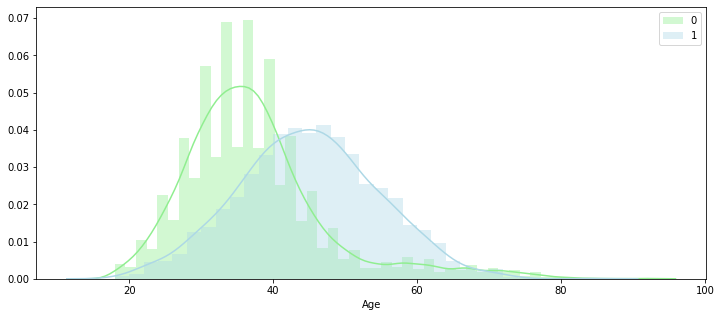

In [19]:
# numeric v/s categorical - probability density distribution analysis
# Age v/s exited

plt.figure(figsize=(12,5))
sns.distplot(df["Age"][df["Exited"]==0],color='lightgreen')
sns.distplot(df["Age"][df["Exited"]==1],color='lightblue')

plt.legend(["0","1"])
plt.show()

Analysis - 
    - for customers age>40 , majority of customers left the bank where as age<40 majority of customers didn't leave the
    bank

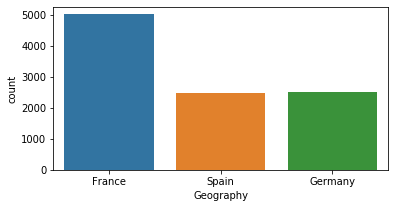

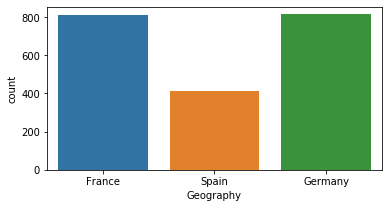

In [20]:
# categorical v/s categorical
# geography v/s Exited - countplot

plt.figure(figsize=(6,3))
sns.countplot(df['Geography'])
plt.show()
plt.figure(figsize=(6,3))
sns.countplot(df['Geography'][df["Exited"]==1])
plt.show()

In [21]:
out = pd.crosstab(df["Geography"],df["Exited"],margins=True)
out

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


In [22]:
out[1]/out['All']

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

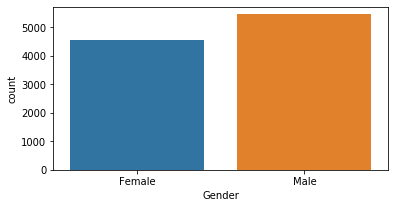

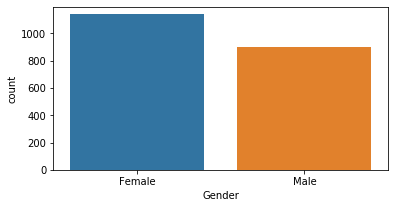

In [23]:
# categorical v/s categorical
# Gender v/s Exited - countplot

plt.figure(figsize=(6,3))
sns.countplot(df['Gender'])
plt.show()
plt.figure(figsize=(6,3))
sns.countplot(df['Gender'][df["Exited"]==1])
plt.show()

Analysis - 
    - majority of female customers left the bank, there is higher dropout rate for female customers

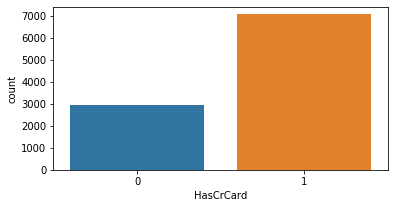

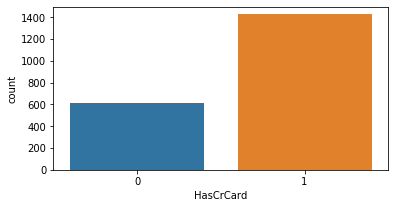

In [24]:
# categorical v/s categorical
# HasCrCard v/s Exited - countplot

plt.figure(figsize=(6,3))
sns.countplot(df['HasCrCard'])
plt.show()
plt.figure(figsize=(6,3))
sns.countplot(df['HasCrCard'][df["Exited"]==1])
plt.show()

Analysis - 
     the percentage of dropout is almost same for customers having and not having credit cards

### Multivariate Analysis

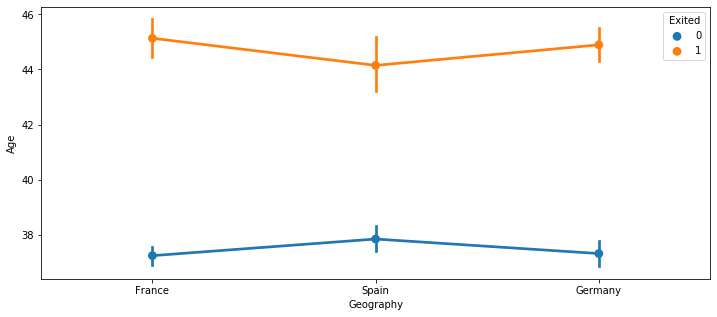

In [25]:
# numeric v/s categorical v/s categorical - pointplot, swarmplot
# x = categorical, y = numeric, hue = categorical
# age v/s geography v/s exited

plt.figure(figsize=(12,5))
sns.pointplot(x="Geography",y="Age",hue="Exited",data=df)
plt.show()

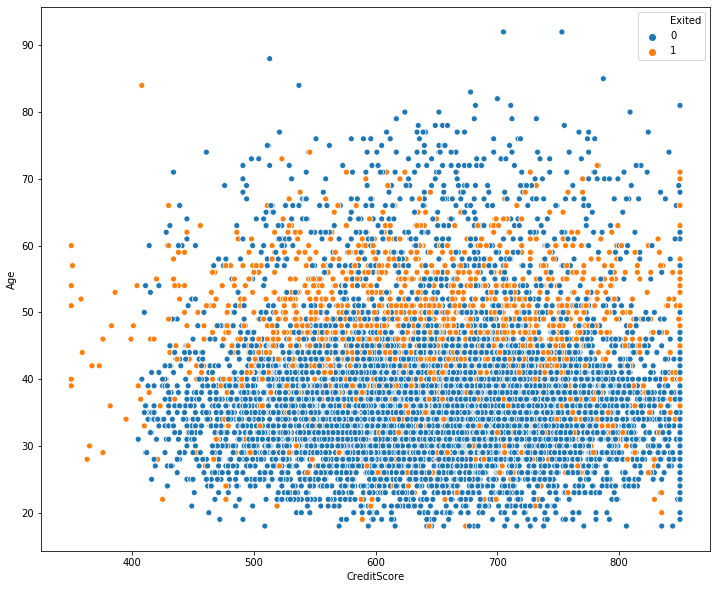

In [26]:
# numeric v/s numeric v/s categorical - scatterplot
# Age v/s CreditScore v/s Exited

plt.figure(figsize=(12,10))
sns.scatterplot(x="CreditScore",y="Age",hue="Exited",data=df)
plt.show()

## Use Statistics

## Correlation Analysis


     - if cor(x,y) >+0.5                       Very good correlation
     - if cor(x,y) is between +0.1 to +0.5     good correlation
     - if cor(x,y) <-0.5                       Very good correlation
     - if cor(x,y) is between -0.1 to -0.5     good correlation
     - if cor(x,y) is between -0.1 to +0.1     bad correlation

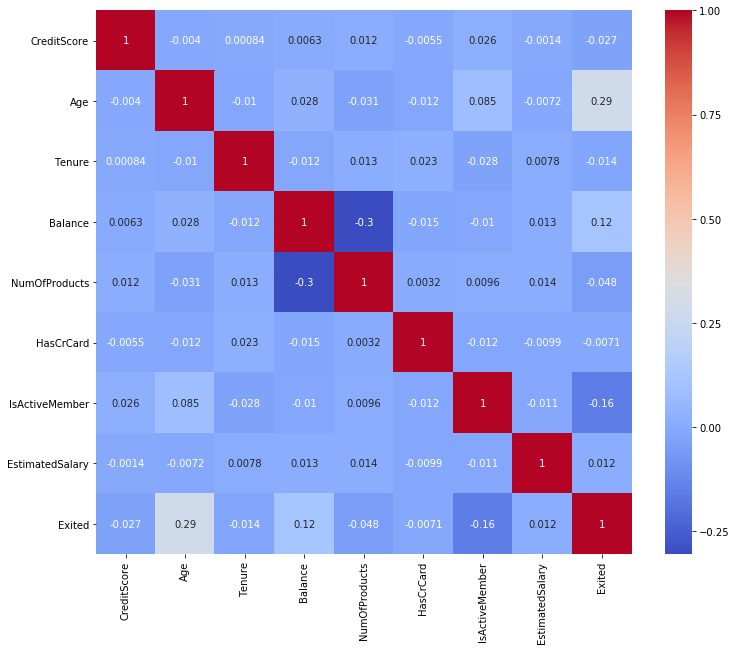

In [33]:
cor = df.corr() # calcualting correlation matrix
# we will use heatmap to visualize correlation matrix
plt.figure(figsize=(12,10))
ax = sns.heatmap(cor,annot=True,cmap="coolwarm")
bot,top = ax.get_ylim()
ax.set_ylim(bot+0.5,top-0.5)
plt.show()

In [34]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or list 